In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, restoration

# Image Blur

## Sharpening filter

In [2]:
# Load gambar
img_ori_blur = cv2.imread("Data/image-blur.jpeg")
img_ori_blur = cv2.cvtColor(img_ori_blur, cv2.COLOR_BGR2RGB)

In [3]:
# Kernel Sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened1 = cv2.filter2D(img_ori_blur, -1, kernel)

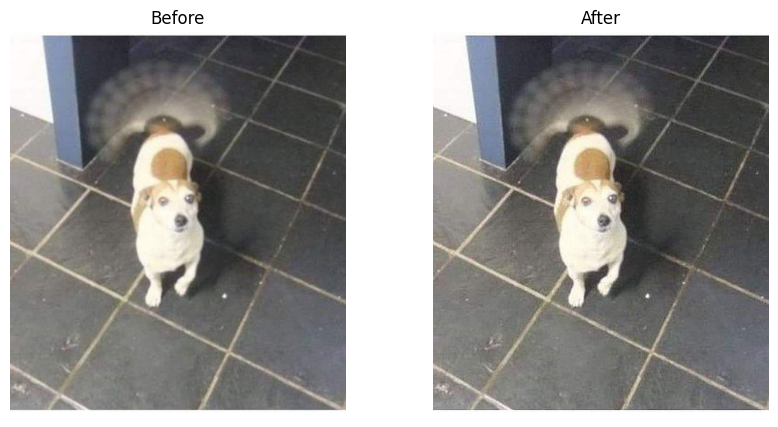

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img_ori_blur)
plt.title("Before")
plt.axis("off")

# Gambar 2: After
plt.subplot(1, 2, 2)
plt.imshow(sharpened1)
plt.title("After")
plt.axis("off")

plt.show()

In [5]:
# Kernel Sharpening
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened2 = cv2.filter2D(img_ori_blur, -1, kernel)

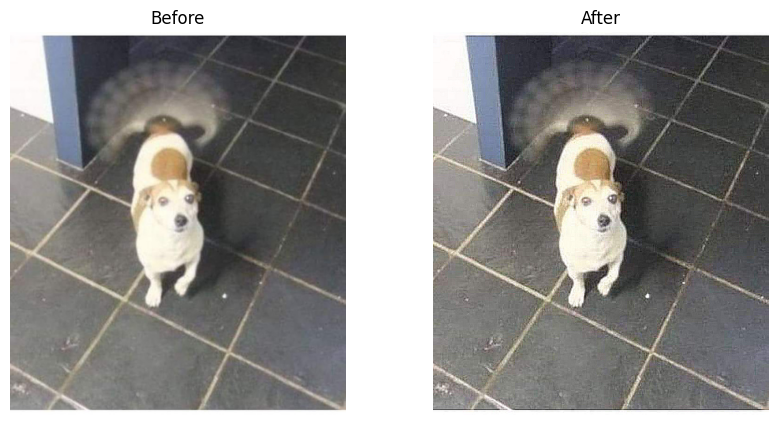

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img_ori_blur)
plt.title("Before")
plt.axis("off")

# Gambar 2: After
plt.subplot(1, 2, 2)
plt.imshow(sharpened2)
plt.title("After")
plt.axis("off")

plt.show()

============================= All Image ==========================================


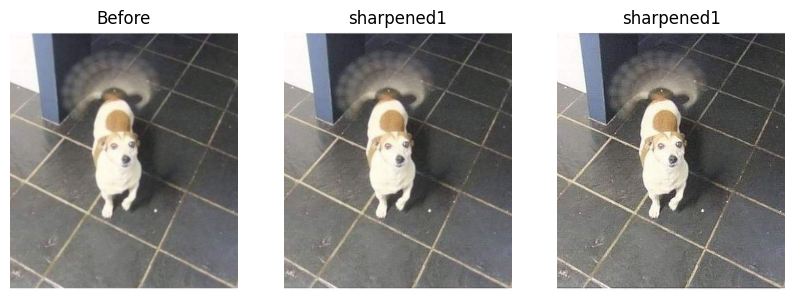

In [7]:
print("============================= All Image ==========================================")
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
plt.imshow(img_ori_blur)
plt.title("Before")
plt.axis("off")

# Gambar 2: After
plt.subplot(1, 3, 2)
plt.imshow(sharpened1)
plt.title("sharpened1")
plt.axis("off")

# Gambar 2: After
plt.subplot(1, 3, 3)
plt.imshow(sharpened2)
plt.title("sharpened1")
plt.axis("off")
plt.show()

## Wiener Deconvolution

In [8]:
from skimage.restoration import wiener

img = cv2.imread("Data/image-blur.jpeg", 0)

# kernel blur (estimasi)
psf = np.ones((5, 5)) / 25  

# Wiener deconvolution
deblur = restoration.wiener(img, psf, balance=0.1, clip=False)

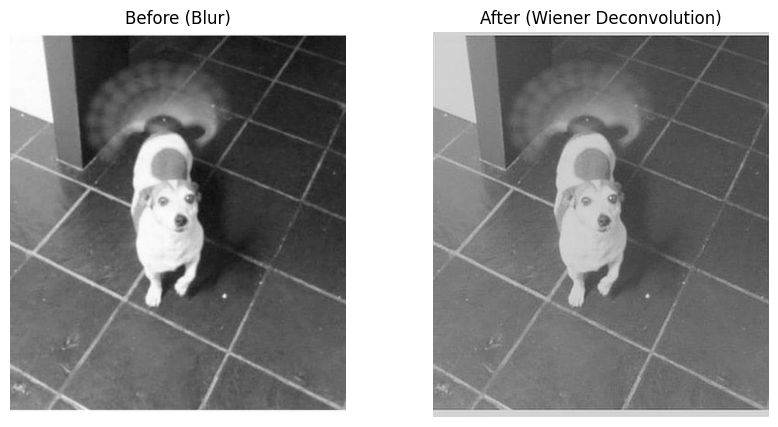

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Before (Blur)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(deblur, cmap="gray")
plt.title("After (Wiener Deconvolution)")
plt.axis("off")

plt.show()

# Low Contras white

## Histogram Equalization

In [10]:
img = cv2.imread("Data/low-contras1.jpg", cv2.IMREAD_GRAYSCALE)

# Histogram Equalization
eq = cv2.equalizeHist(img)

# CLAHE (lebih halus, cegah over-contrast)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

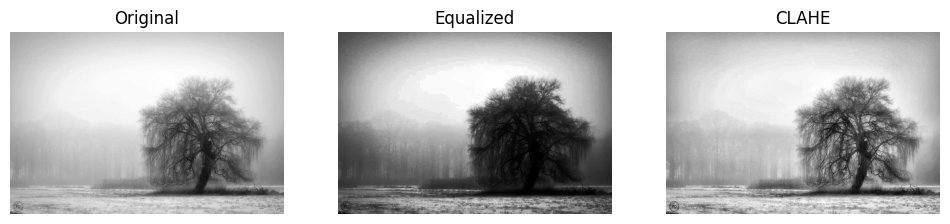

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(eq, cmap="gray"), plt.title("Equalized"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(clahe_img, cmap="gray"), plt.title("CLAHE"), plt.axis("off")
plt.show()

## Gamma Correction

In [12]:
def adjust_gamma(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [13]:
img = cv2.imread("Data/low-contras1.jpg")
gamma_img = adjust_gamma(img, gamma=1.5)

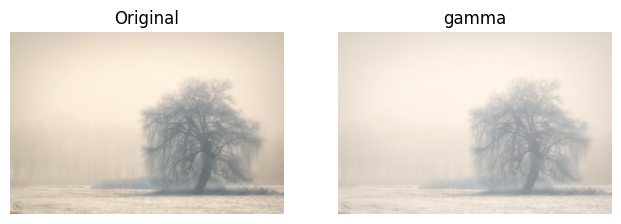

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(gamma_img, cmap="gray"), plt.title("gamma"), plt.axis("off")
plt.show()

## LAB Enhance Luminance

In [15]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l)

limg = cv2.merge((cl, a, b))
enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

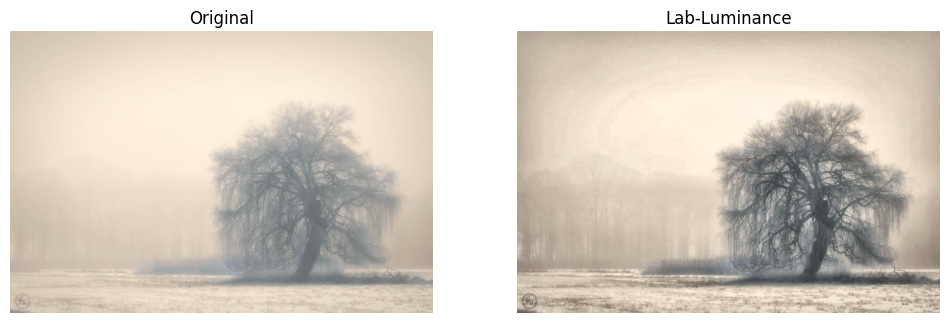

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title("Original"), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(enhanced), plt.title("Lab-Luminance"), plt.axis("off")
plt.show()

# Low Contras Dark

## Histogram Equalization

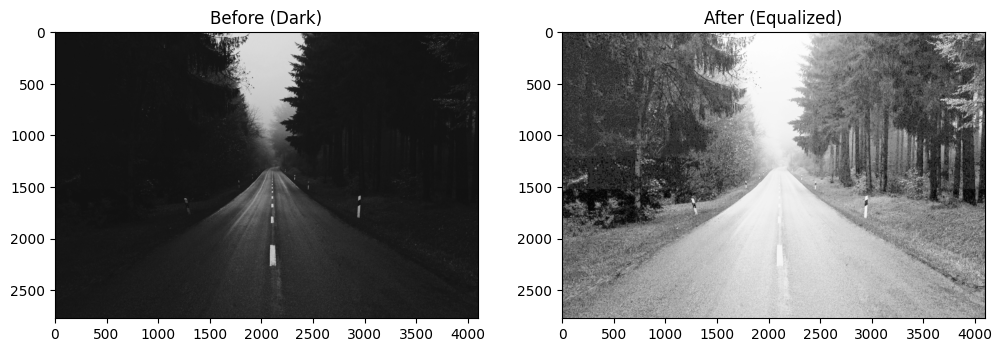

In [20]:
img = cv2.imread("Data/low-contras-dark.jpg", cv2.IMREAD_GRAYSCALE)

equ = cv2.equalizeHist(img)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.title("Before (Dark)"), plt.imshow(img, cmap='gray')
plt.subplot(1,2,2), plt.title("After (Equalized)"), plt.imshow(equ, cmap='gray')
plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

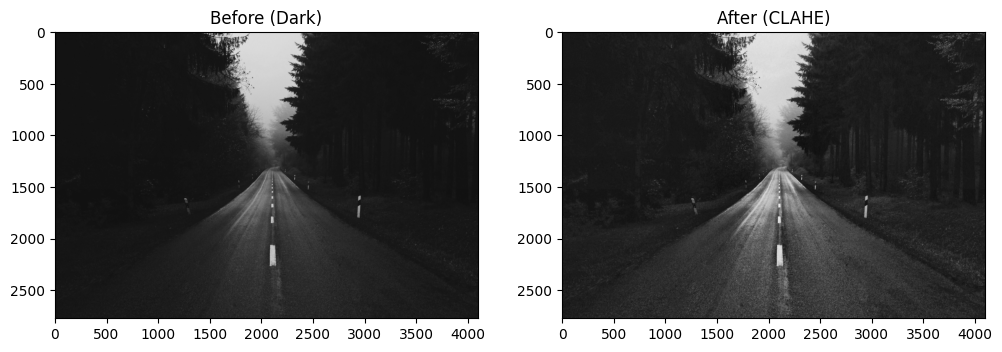

In [21]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.title("Before (Dark)"), plt.imshow(img, cmap='gray')
plt.subplot(1,2,2), plt.title("After (CLAHE)"), plt.imshow(cl1, cmap='gray')
plt.show()

## Gamma Correction

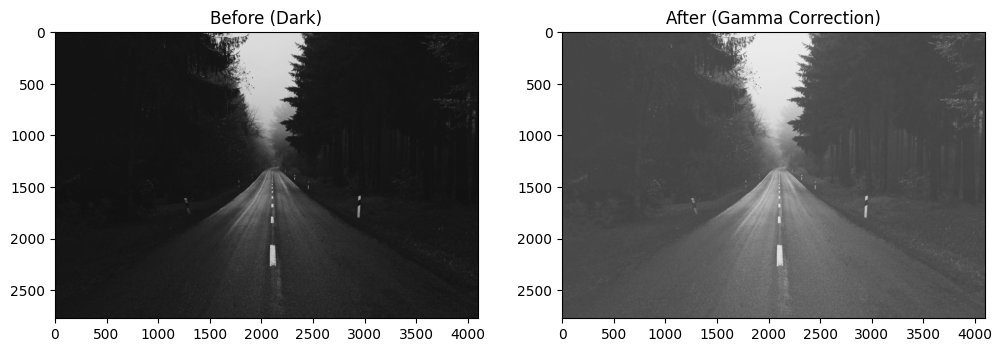

In [22]:
gamma = 0.5  # < 1 untuk cerah, > 1 untuk gelap
look_up_table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
bright = cv2.LUT(img, look_up_table)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.title("Before (Dark)"), plt.imshow(img, cmap='gray')
plt.subplot(1,2,2), plt.title("After (Gamma Correction)"), plt.imshow(bright, cmap='gray')
plt.show()